In [392]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [393]:
#загружаем таблицу, убираем пропуски, меняем тип данных в колонке time

data=pd.read_csv('price_long.csv')
df=data.dropna()
data['Time']=pd.to_datetime(data['Time'])
df['Time'] = pd.to_datetime(data['Time'])
df.info()

df.tail(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       1000 non-null   datetime64[ns]
 1   Price ($)  1000 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 15.8 KB


,Time,Price ($)
995,2017-06-12 11:00:00,4.08
996,2017-06-12 12:00:00,3.75
997,2017-06-12 13:00:00,5.19
998,2017-06-12 14:00:00,4.80
999,2017-06-12 15:00:00,5.44


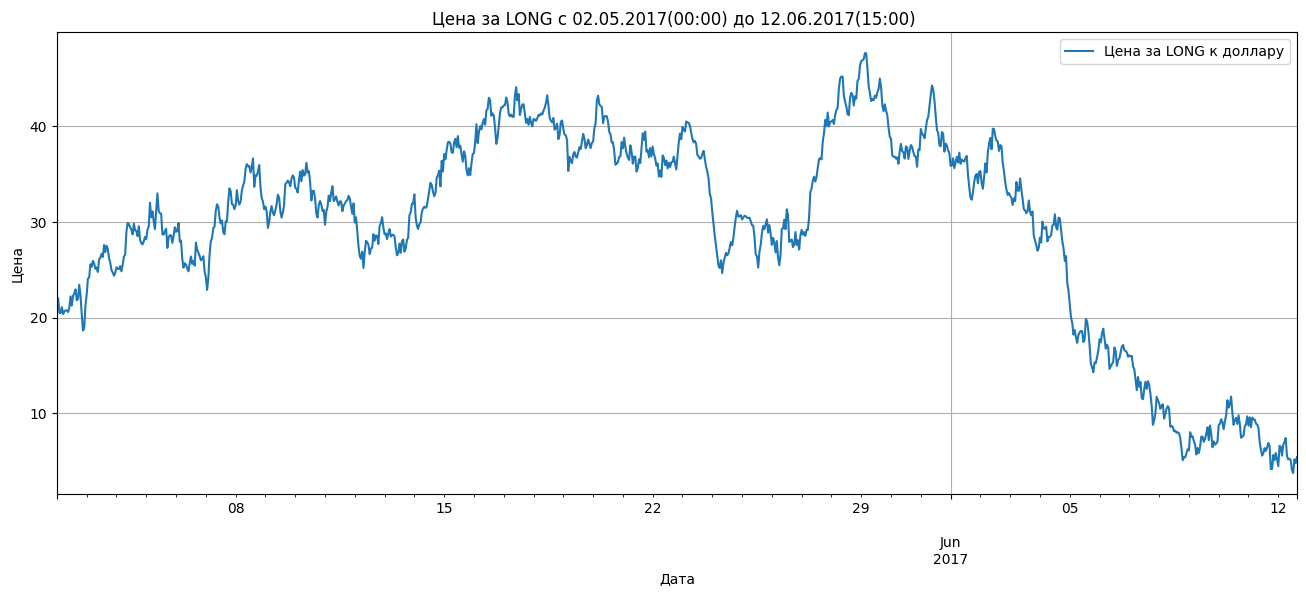

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2017-05-02 00:00:00 to 2017-06-12 15:00:00
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price ($)  1000 non-null   float64
dtypes: float64(1)
memory usage: 15.6 KB


In [394]:
#рисуем график

data.set_index('Time', inplace=True)
data.plot(figsize=(16,6), 
            grid=True, 
            xlabel='Дата',
            ylabel='Цена',
            title='Цена за LONG с 02.05.2017(00:00) до 12.06.2017(15:00) ')
plt.legend(['Цена за LONG к доллару'])
plt.show()
data.info()

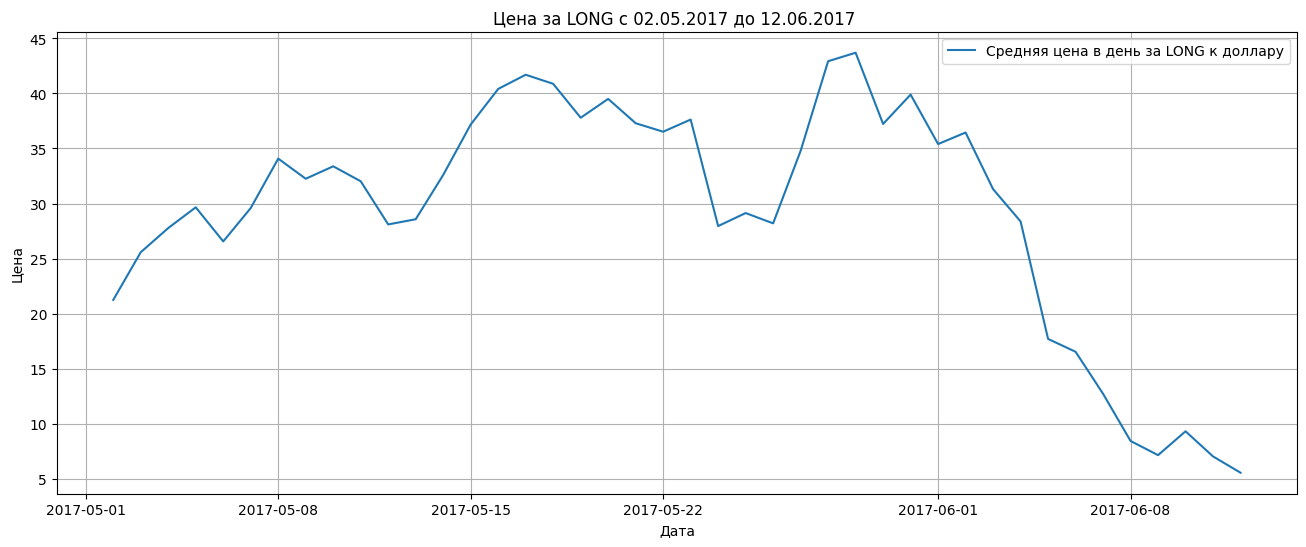

<class 'pandas.core.series.Series'>
Index: 42 entries, 2017-05-02 to 2017-06-12
Series name: Price ($)
Non-Null Count  Dtype  
--------------  -----  
42 non-null     float64
dtypes: float64(1)
memory usage: 672.0+ bytes


In [395]:
#  Группируем данные по дням с агрегирующей функцией среднего значения, строим график сгруппированных данных.

df=df.groupby(df['Time'].dt.date)['Price ($)'].mean()
df.plot(figsize=(16,6), 
            grid=True, 
            xlabel='Дата',
            ylabel='Цена',
            title='Цена за LONG с 02.05.2017 до 12.06.2017 ')
plt.legend(['Средняя цена в день за LONG к доллару'])
plt.show()
df.info()

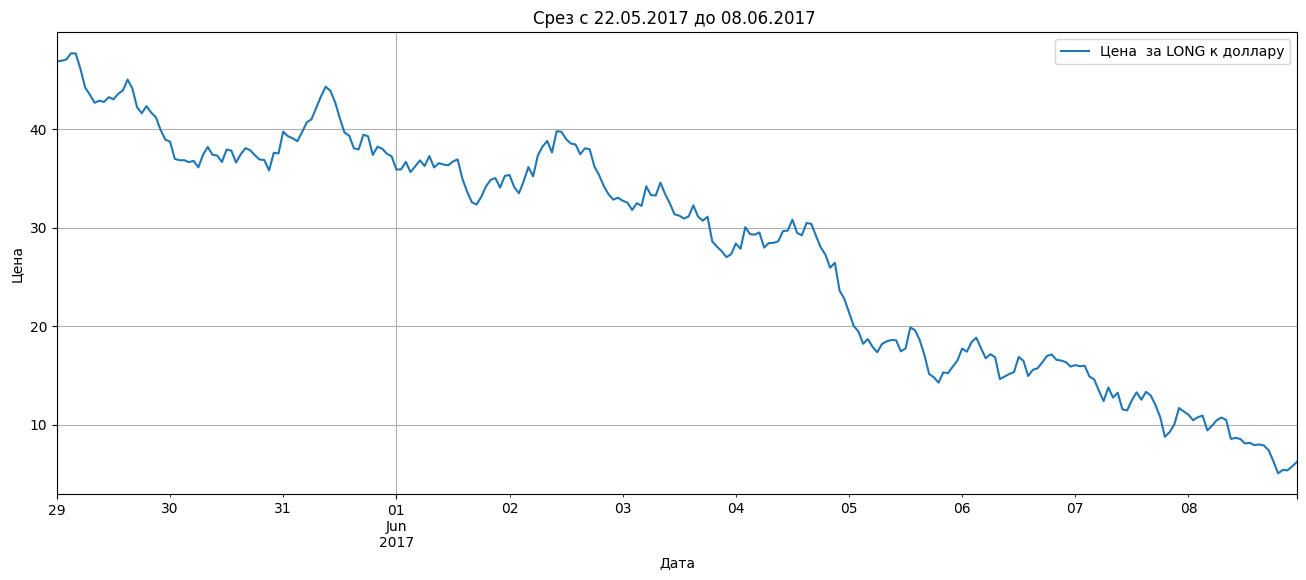

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2017-05-02 00:00:00 to 2017-06-12 15:00:00
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price ($)  1000 non-null   float64
dtypes: float64(1)
memory usage: 47.9 KB


In [396]:
#строим срез за 10 дней (начался спад)

data['2017-05-29':'2017-06-08'].plot(figsize=(16,6), 
                                       grid=True, 
                                       xlabel='Дата',
                                       ylabel='Цена',
                                       title='Срез с 22.05.2017 до 08.06.2017 ')
plt.legend(['Цена  за LONG к доллару'])
plt.show()
data.info()

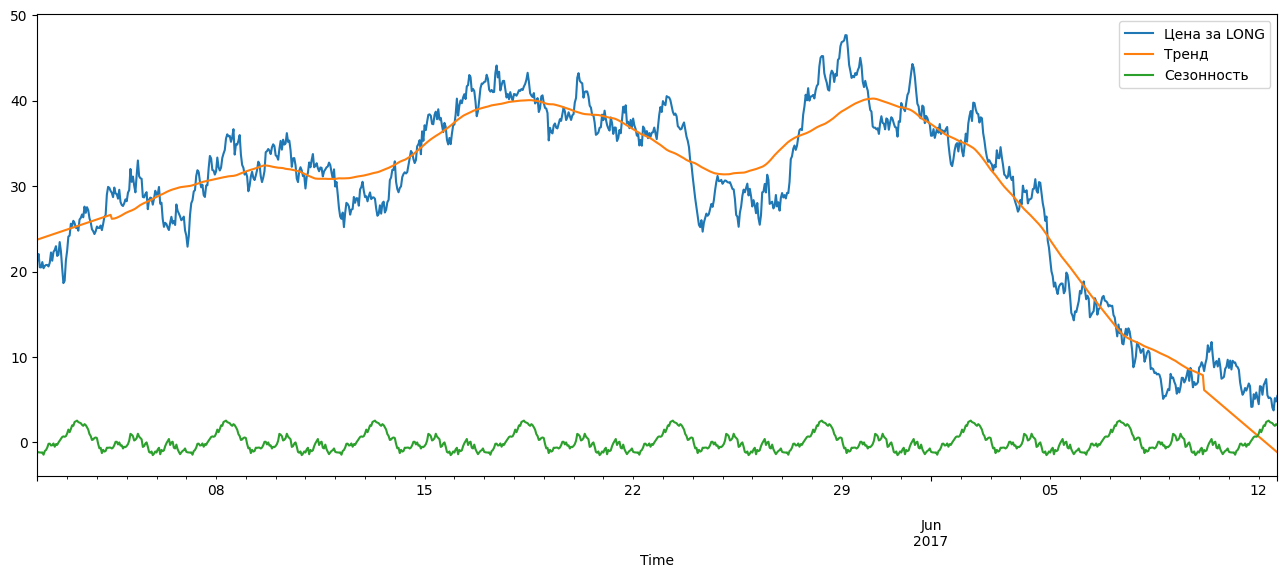

In [397]:
#раскладываю ряд на компоненты

decomposition = seasonal_decompose(data['2017-05-02':'2017-06-12'], 
                                   period=120, 
                                   extrapolate_trend='freq')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

data['2017-05-02':'2017-06-12'].plot(figsize=(16,6))
trend.plot()
seasonal.plot()
plt.legend(['Цена за LONG', 'Тренд', 'Сезонность'])
plt.show()

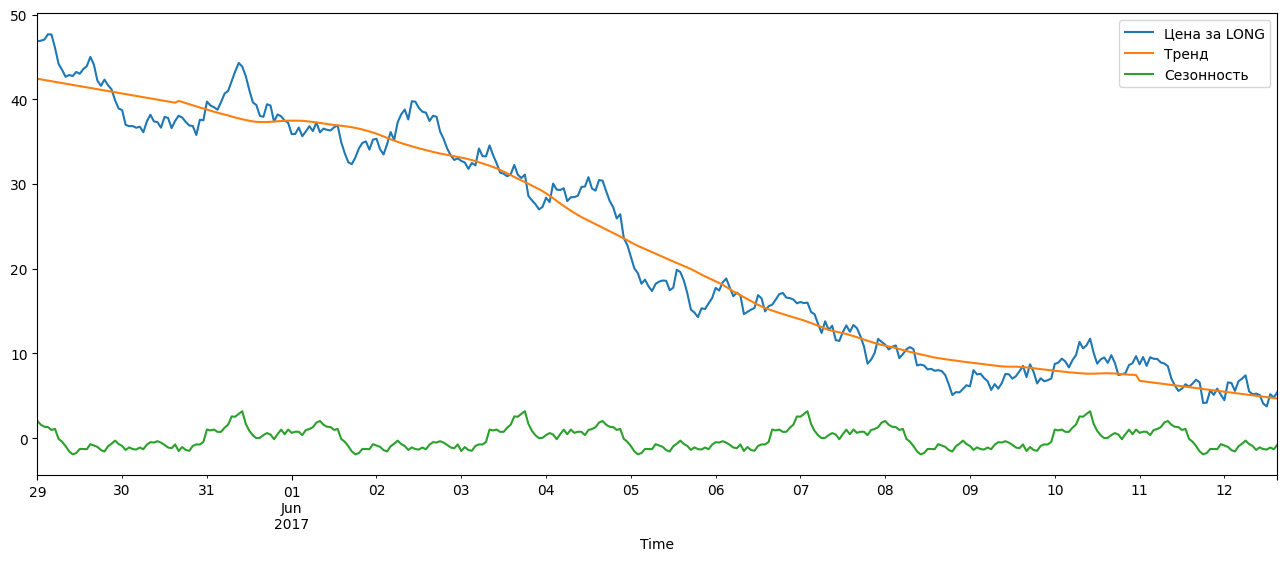

In [398]:
decomposition = seasonal_decompose(data['2017-05-29':'2017-06-12'], 
                                   period=80, 
                                   extrapolate_trend='freq')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

data['2017-05-29':'2017-06-12'].plot(figsize=(16,6))
trend.plot()
seasonal.plot()
plt.legend(['Цена за LONG', 'Тренд', 'Сезонность'])
plt.show()

Я взял весь ряд и разложил его на компоненты, как мы видим, никакого тренда нет, однако начиная с 29.05, цена начинает убывать с каждым днем в среднем все больше и больше ( если рассмотреть срез начиная с падения, то можно увидеть постоянно убывающую функцию), никакой сезонности тоже нет.

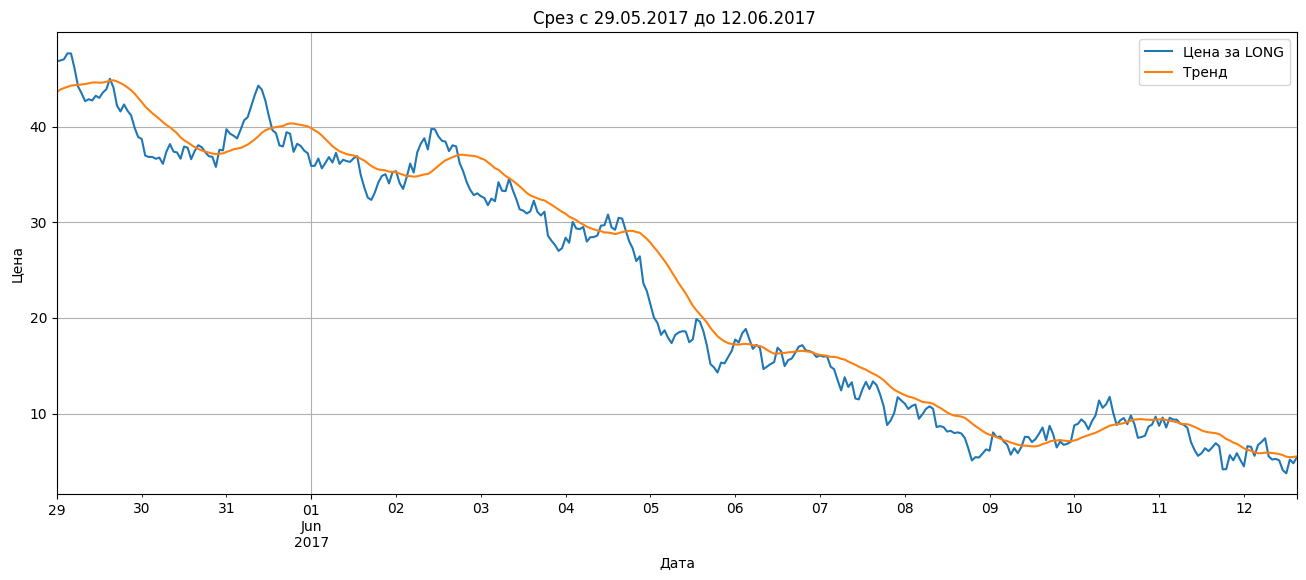

In [388]:
# вычисляем скользящее среднее ряда

data_copy = data.copy()
data_copy['mean'] = data_copy.rolling(20).mean()

data_copy['2017-05-29':'2017-06-12'].plot(figsize=(16,6), 
               grid=True,
               xlabel='Дата',
               ylabel='Цена',
               title='Срез с 29.05.2017 до 12.06.2017 ')

plt.legend(['Цена за LONG', 'Тренд', 'Сезонность'])
plt.show()

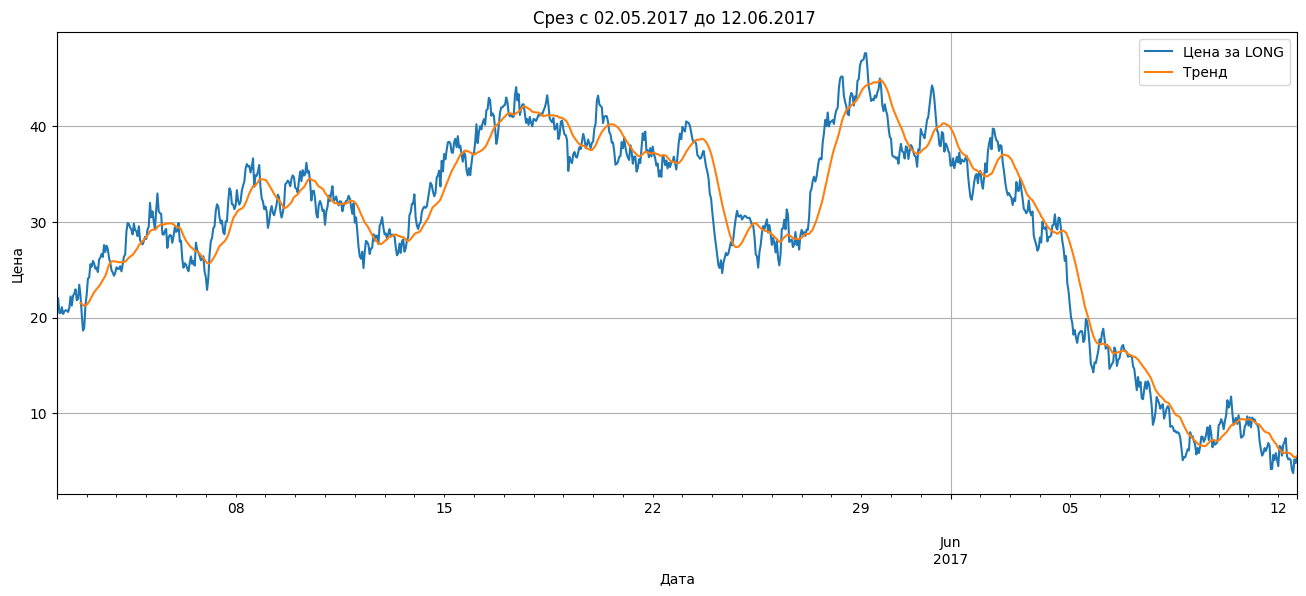

In [389]:
data_copy = data.copy()
data_copy['mean'] = data_copy.rolling(20).mean()

data_copy['2017-05-02':'2017-06-12'].plot(figsize=(16,6), 
               grid=True,
               xlabel='Дата',
               ylabel='Цена',
               title='Срез с 02.05.2017 до 12.06.2017 ')

plt.legend(['Цена за LONG', 'Тренд', 'Сезонность'])
plt.show()

#Выводы:
имеются данные почасового изменения цены (в долларах) за LONG(думаю, что речь все таки о криптовалюте).Два столбца-Time(тип данных object) и Price(float). Шаг-1 час.Тип данных Time был изменен на datetime. По графику видно, что в общем  ряд стационарный-циклических или сезонных скачков нет, однако в конце проглядывается тентенция на падение.